In [1]:
import os
import numpy as np
import pandas as pd
from   tqdm.notebook import trange
from   tti_explorer import config, utils
from   tti_explorer.case import simulate_case, CaseFactors
from   tti_explorer.contacts import EmpiricalContactsSimulator
from   tti_explorer.strategies import TTIFlowModel, RETURN_KEYS
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

from   matplotlib import colors as mcolors
from   matplotlib import cm
import numpy as np
import GPy
from   emukit_new.core import ContinuousParameter, ParameterSpace
from   emukit_new.sensitivity.monte_carlo import ModelFreeMonteCarloSensitivity
from   emukit_new.core.initial_designs import RandomDesign
from   GPy.models import GPRegression
from   emukit_new.model_wrappers import GPyModelWrapper
from   emukit_new.sensitivity.monte_carlo import MonteCarloSecondOrderSensitivity
from   emukit_new.experimental_design.acquisitions import IntegratedVarianceReduction, ModelVariance
from   emukit_new.experimental_design.experimental_design_loop import ExperimentalDesignLoop
import matplotlib.pyplot as plt
import teaching_plots as plot
import mlai
import pandas as pd
from   tti_explorer.strategies import TTIFlowModel
def print_doc(func):
    print(func.__doc__)
rng = np.random.RandomState(0)

def load_csv(pth):
    return np.loadtxt(pth, dtype=int, skiprows=1, delimiter=",")
path_to_bbc_data = os.path.join("../../data", "bbc-pandemic")


def update_policy_config(app_uptake, pol_compl, wfh, go_to_school_prob, asym_fac):
    policy_config['app_cov'] = app_uptake
    policy_config['compliance'] = pol_compl
    policy_config['wfh_prob'] = wfh
    policy_config['go_to_school_prob']  = go_to_school_prob
    contacts_config['asymp_factor']=asym_fac
    return policy_config, contacts_config


#     contacts_config['work_sar']=work_sar
def update_policy_config(app_uptake, pol_compl):
    policy_config['app_cov'] = app_uptake
    policy_config['compliance'] = pol_compl
    return policy_config

# policy_config = update_policy_config(0.5, 0.05)
# Separating this because it is built from the ammended policy_config

from scipy.stats import gamma


def update_case_config(p_day_noticed_symptoms_ab, inf_profile_ab):
    alpha = [p_day_noticed_symptoms_ab[0], inf_profile_ab[0]]
    beta = [p_day_noticed_symptoms_ab[1], inf_profile_ab[1]]
    strs = ['p_day_noticed_symptoms', 'inf_profile']
    
    for i in range(2):
    
        x = np.linspace(gamma.pdf(0.01, a=alpha[i], scale=1/beta[i]),
                        gamma.pdf(0.99, a=alpha[i], scale=1/beta[i]), 10)

        #apply softmax
        norm = np.exp(x)
        s = sum(norm)
        norm = np.round(norm/s, decimals=2)
        norm[-1] = 1- sum(norm[:-1])

        case_config[strs[i]] = norm
    
    return case_config



def update_policy_config(latent_var):
    policy_config['latent_period'] = int(latent_var)
    return policy_config

[[2.27580461 1.15454065 4.46690989 4.22319852 4.09372654]
 [2.70168445 4.92139415 2.62151939 1.39721258 2.03939661]
 [3.19179248 3.5563196  4.17318107 2.6738318  4.15411347]
 [2.08716763 4.22572307 2.9272846  4.62893304 2.27087892]
 [1.63067914 1.25787297 1.07924708 2.99160261 7.15682024]
 [3.30323297 4.68024347 1.44497238 3.27692395 9.12272768]
 [4.38330505 4.94127021 3.19189173 4.20757515 8.17481577]
 [3.19650233 2.72988795 4.04284074 4.43013223 8.02342325]
 [1.38179355 4.93603884 4.06959422 3.62051724 6.76175638]
 [2.95842736 4.46665279 1.43854227 3.14277976 2.99183165]
 [2.21136552 4.16647822 3.53305408 1.62040118 2.2398752 ]
 [2.9551342  1.79320986 4.80953126 3.7168075  3.8967207 ]
 [3.14234598 4.98986107 3.1574958  1.61838154 5.54460913]
 [4.72448034 1.66909645 2.37641474 4.31268302 8.57554324]
 [4.24160395 1.0627503  1.28025655 3.70323523 5.65321982]
 [1.27291257 2.40672108 3.7119094  2.58688977 4.14781143]
 [4.03951822 4.32905696 4.08394742 2.27447849 7.52084784]
 [2.13917024 4


Optimization restart 1/1, f = -68.70463980172102
Optimization restart 1/1, f = -68.70463980255572



Optimization restart 1/1, f = -70.17498239125806



Optimization restart 1/1, f = -71.53112312822904



Optimization restart 1/1, f = -73.21584905342903



Optimization restart 1/1, f = -75.06226607008392



Optimization restart 1/1, f = -76.49697562186648
main_effects:  {'alpha_inf_profile': array([0.39169236]), 'beta_inf_profile': array([0.11884133]), 'alpha_day_noticed': array([0.30219282]), 'beta_day_noticed': array([0.11891395]), 'latent_period': array([0.31407313])}
secondary_effects {'alpha_inf_profile+ \nbeta_inf_profile': array([-0.11939338]), 'alpha_inf_profile+ \nalpha_day_noticed': array([0.09205895]), 'alpha_inf_profile+ \nbeta_day_noticed': array([-0.11882818]), 'alpha_inf_profile+ \nlatent_period': array([-0.10239405]), 'beta_inf_profile+ \nalpha_day_noticed': array([-0.11875021]), 'beta_inf_profile+ \nbeta_day_noticed': array([-0.11891134]), 'beta_inf_profile+ \nlatent_period': array([-0.11895621]), 'alpha_day_noticed+ \nbeta_day_noticed': array([-0.1190188]), 'alpha_day_noticed+ \nlatent_period': array([-0.07546547]), 'beta_day_noticed+ \nlatent_period': array([-0.1188918])}
total_effects:  {'alpha_inf_profile': array([0.43150463]), 'beta_inf_profile': array([-0.26405963]

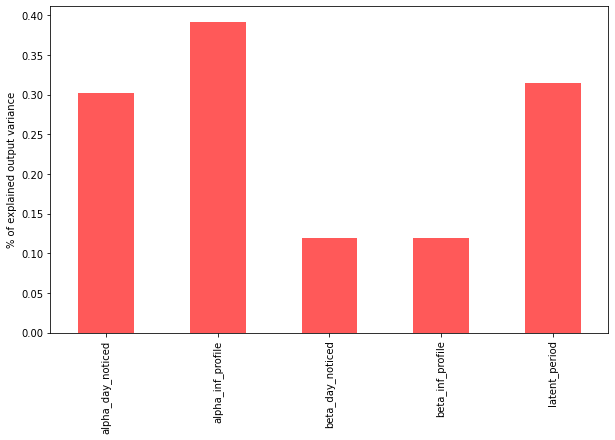

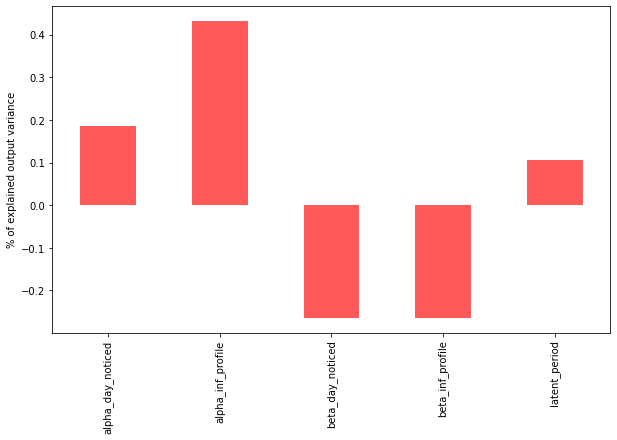

In [3]:




"""
Runs TTI simulator as many times as the different input initialisations.
The main reason we need this is to put in to EmuKit for the Experimental
Design Loop.

Args:
    pol_configs (list): Inputs are [app_cov, compliance]

Returns:
    effective_rs (np.expand_dims(np.array(to_return), 1)): For every simulation run, return
    the effective r, as was plotted form Bryn and Andrei previously.

"""
#simulate_contacts = EmpiricalContactsSimulator(over18, under18, rng)


def run_tti_sim(pol_configs):
    to_return=[]
    for vals in pol_configs:      
        case_config = update_case_config([vals[0],vals[1]], [vals[2], vals[3]])
        policy_config = update_policy_config(vals[4])
        factor_config = utils.get_sub_dictionary(policy_config, config.DELVE_CASE_FACTOR_KEYS)
        strategy_config = utils.get_sub_dictionary(policy_config, config.DELVE_STRATEGY_FACTOR_KEYS)
        tti_model = TTIFlowModel(rng, **strategy_config)
        n_cases = 10000
        outputs = list()
        temp =[]
        for _ in trange(n_cases):
            case = simulate_case(rng, **case_config)
            case_factors = CaseFactors.simulate_from(rng, case, **factor_config)
            contacts = simulate_contacts(case, **contacts_config)
            res = tti_model(case, contacts, case_factors)
            outputs.append(res)
            if res["Effective R"] >= 0:
                temp.append(res["Effective R"]) # Get effective R. Only non-nan vals are kept
        to_return.append(np.mean(temp))
    return np.expand_dims(np.array(to_return), 1)



def run_sensitivity(strigency, initial_samples, bo_samples, mc_samples, col):

    variable_domain = [1,5] 
    variable_domain2 = [1,5] 
    latent_domain = [1,10] 

    initial_samples = 50 # number of random runs to perform before starting experimental design 
    space = ParameterSpace([ContinuousParameter('alpha_inf_profile', *variable_domain),
                            ContinuousParameter('beta_inf_profile', *variable_domain),
                            ContinuousParameter('alpha_day_noticed', *variable_domain2),
                            ContinuousParameter('beta_day_noticed', *variable_domain2),
                            ContinuousParameter('latent_period', *latent_domain)]) # init param space for experimental design
    design = RandomDesign(space)
    x = design.get_samples(initial_samples) # get 5 random combinations of initialisations

    print(x)
    y = run_tti_sim(x) # obtain corresponding effective_rs

    # Fitting emulator to data, x: (app_cov, compliance), y: effective_r
    Num_of_param = 5
    kern_eq = GPy.kern.RBF(input_dim=Num_of_param, ARD = True)
    kern_bias = GPy.kern.Bias(input_dim=Num_of_param)
    kern = kern_eq + kern_bias
    model_gpy = GPRegression(x,y, kern)
    model_gpy.kern.variance = 1**2
    model_gpy.likelihood.variance.fix(1e-5)
    model_emukit = GPyModelWrapper(model_gpy) 
    model_emukit.optimize() # optimise (max log-lik)

    # Initialise experimental design loop. Using integrated variance as acquisition
    # to "query" the input space aiming to reduce uncertainty over the func we're approx. i.e. effective_r
    # Initialise experimental design loop. Using integrated variance as acquisition
    # to "query" the input space aiming to reduce uncertainty over the func we're approx. i.e. effective_r
    num_of_loops = 5
    integrated_variance = IntegratedVarianceReduction(space=space, model=model_emukit)
    ed = ExperimentalDesignLoop(space=space, model=model_emukit, acquisition = integrated_variance)
    ed.run_loop(run_tti_sim, num_of_loops)
    
    

    # Plot Main Effects
    num_mc = mc_samples
    senstivity = MonteCarloSecondOrderSensitivity(model = model_emukit, input_domain = space)
    main_effects_gp, secondary_effects_gp, total_effects_gp, p = senstivity.compute_effects(num_monte_carlo_points = num_mc)
    print("main_effects: ", main_effects_gp)
    print("secondary_effects", secondary_effects_gp)
    print("total_effects: ", total_effects_gp)
    
    fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
    main_effects_gp_plot = {ivar: main_effects_gp[ivar][0] for ivar in main_effects_gp}
    d = {"gp":main_effects_gp_plot}
    pd.DataFrame(d).plot(kind='bar', ax=ax, color=col,legend=False, alpha=0.65)
    plt.ylabel('% of explained output variance')
    out_name = "main-effects-c-v-c-{}.pdf".format(strigency)
    
    



    mlai.write_figure(filename=out_name, directory='./uq')

    # Plot Total Effects
    fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
    total_effects_gp_plot = {ivar: total_effects_gp[ivar][0] for ivar in total_effects_gp}
    d = {"go": total_effects_gp_plot}
    pd.DataFrame(d).plot(kind='bar', ax=ax, legend=False, color=col, alpha=0.65)
    ax.set_ylabel('% of explained output variance')
    out_name = "total-effects-c-v-c-{}.pdf".format(strigency)
    mlai.write_figure(filename=out_name)

#     app_cov_eval = np.linspace(0.05, 1, 100)
#     app_com_eval = np.linspace(0.05, 1, 100)
#     points=[]
#     for i in app_cov_eval:
#         for j in app_com_eval:
#             points.append([i, j])
#     points = np.asarray(points)

#     X = points[:,0].reshape((100,100))
#     Y = points[:,1].reshape((100,100))
#     Z, _ = model_gpy.predict(points)
#     Z = Z.reshape((100,100))

#     print(X.shape)
#     print(Y.shape)
#     # print(Z[Z<1])


#     fig = plt.figure()
#     ax = fig.add_subplot(projection='3d')
#     ax.plot_surface(X, Y, Z, alpha=0.7, color='red')
#     # ax.scatter(x[:,0], x[:,1], y, color='red', alpha=0.99)
#     ax.set_xlabel('App Uptake')
#     ax.set_ylabel('Compliance')
#     ax.set_zlabel('Effective R')
#     out_name = "func-plot-{}.pdf".format(strigency)

#     plt.savefig(out_name, format='pdf', bbox_inches='tight')


s_levels=['S1_test_based_TTI_test_contacts','S2_test_based_TTI_test_contacts','S3_test_based_TTI_test_contacts','S4_test_based_TTI_test_contacts','S5_test_based_TTI_test_contacts',]

over18 = load_csv(os.path.join(path_to_bbc_data, "contact_distributions_o18.csv"))
under18 = load_csv(os.path.join(path_to_bbc_data, "contact_distributions_u18.csv"))
simulate_contacts = EmpiricalContactsSimulator(over18, under18, rng)
cidx=0
cols = ['red', 'tomato', 'orange', 'deepskyblue', 'green']
# for strigency in s_levels:
case_config = config.get_case_config("delve")
contacts_config = config.get_contacts_config("delve")
policy_config = config.get_strategy_configs("delve", s_levels[4])[s_levels[4]]
factor_config = utils.get_sub_dictionary(policy_config, config.DELVE_CASE_FACTOR_KEYS)
strategy_config = utils.get_sub_dictionary(policy_config, config.DELVE_STRATEGY_FACTOR_KEYS)
rng = np.random.RandomState(42)

tti_model = TTIFlowModel(rng, **strategy_config)

run_sensitivity(s_levels[4], 50, 50, 10000, cols[cidx])
cidx+=1